<a href="https://colab.research.google.com/github/Girii-397/COLAB_DATA-ANALYST/blob/main/DAY_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

# Load the dataset
file_path = "/content/PoliceKillingsUS.csv"
# Try loading the dataset with a different encoding
data = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display basic information about the dataset after successful loading
data_info = {
    "head": data.head(),  # First few rows of the dataset
    "info": data.info(),  # Summary of dataset structure
    "missing_values": data.isnull().sum()  # Count of missing values per column
}
data_info



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

{'head':    id                name      date   manner_of_death       armed   age  \
 0   3          Tim Elliot  02/01/15              shot         gun  53.0   
 1   4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
 2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
 3   8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
 4   9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   
 
   gender race           city state  signs_of_mental_illness threat_level  \
 0      M    A        Shelton    WA                     True       attack   
 1      M    W          Aloha    OR                    False       attack   
 2      M    H        Wichita    KS                    False        other   
 3      M    W  San Francisco    CA                     True       attack   
 4      M    H          Evans    CO                    False       attack   
 
           flee  body_camera  
 0  Not fleeing        False  
 1  Not 

**Dataset Overview**

The dataset contains 2535 records with 14 columns. Here's a brief summary of its structure:

**Columns:**

#id: Unique identifier for each entry.
#name: Name of the individual.
#date: Incident date (string format).
# manner_of_death: How the individual died (e.g., shot, shot and Tasered).
#armed: Whether the individual was armed and with what.
#age: Age of the individual (some missing values).
#gender: Gender of the individual (Male/Female).
#race: Race of the individual (some missing values).
#city and state: Location of the incident.
#signs_of_mental_illness: Boolean indicating if there were signs of mental illness.
#threat_level: Perceived threat level.
#flee: Whether the individual attempted to flee.
#body_camera: Boolean indicating if a body camera was used.

 **issues Detected:**

Missing values in armed, age, race, and flee.
The date column needs to be converted to a datetime format for proper analysis.

In [21]:
# Data Cleaning

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Handle missing values
# Fill missing 'age' with the median age
data['age'].fillna(data['age'].median(), inplace=True)

# Fill missing 'armed' and 'flee' with 'Unknown'
data['armed'].fillna('Unknown', inplace=True)
data['flee'].fillna('Unknown', inplace=True)

# Fill missing 'race' with 'Unknown'
data['race'].fillna('Unknown', inplace=True)

# Verify the cleaned data
cleaned_data_info = {
    "missing_values_after_cleaning": data.isnull().sum(),  # Count of missing values after cleaning
    "head": data.head()  # Sample of cleaned data
}
cleaned_data_info


<ipython-input-21-8fae4039b549>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')
<ipython-input-21-8fae4039b549>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
<ipython-input-21-8fae4039b549>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series 

{'missing_values_after_cleaning': id                         0
 name                       0
 date                       0
 manner_of_death            0
 armed                      0
 age                        0
 gender                     0
 race                       0
 city                       0
 state                      0
 signs_of_mental_illness    0
 threat_level               0
 flee                       0
 body_camera                0
 dtype: int64,
 'head':    id                name       date   manner_of_death       armed   age  \
 0   3          Tim Elliot 2015-02-01              shot         gun  53.0   
 1   4    Lewis Lee Lembke 2015-02-01              shot         gun  47.0   
 2   5  John Paul Quintero 2015-03-01  shot and Tasered     unarmed  23.0   
 3   8     Matthew Hoffman 2015-04-01              shot  toy weapon  32.0   
 4   9   Michael Rodriguez 2015-04-01              shot    nail gun  39.0   
 
   gender race           city state  signs_of_mental_illness

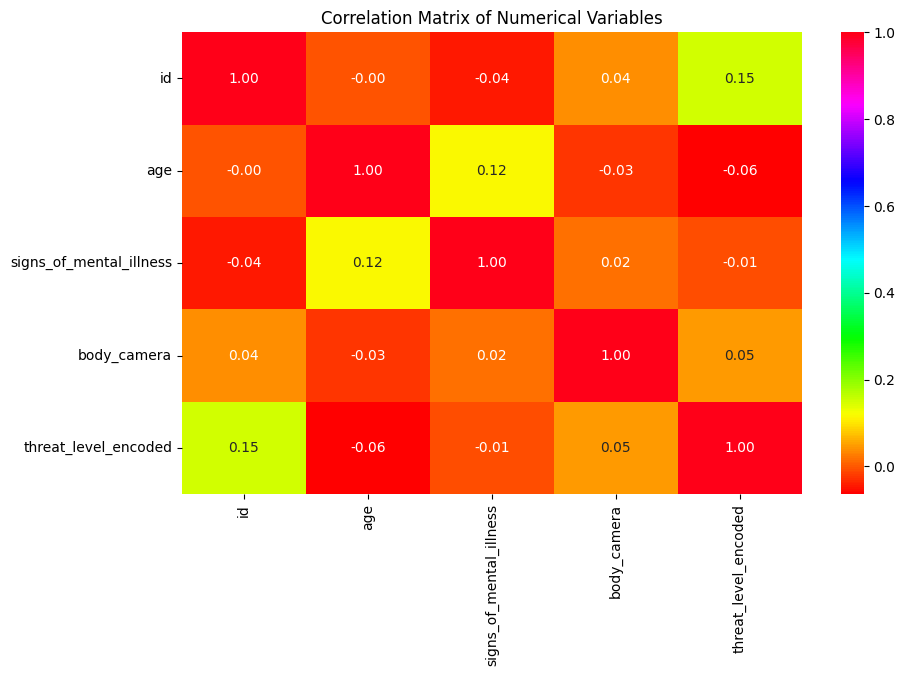

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations for numerical variables
correlation_matrix = data.select_dtypes(include=['float64', 'int64', 'bool']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='hsv', fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


In [23]:
# Compute correlations for numerical variables in the dataset
correlation_matrix = data.select_dtypes(include=['float64', 'int64', 'bool']).corr()

# Display the correlation matrix
correlation_matrix


,id,age,signs_of_mental_illness,body_camera
id,1.000000,-0.003374,-0.043706,0.038786
age,-0.003374,1.000000,0.116713,-0.025621
signs_of_mental_illness,-0.043706,0.116713,1.000000,0.015721
body_camera,0.038786,-0.025621,0.015721,1.000000


# **1. Stacked Bar Chart: Gender by Manner of Death**
Purpose:
# Visualizes the distribution of manner of death across gender groups.
Interpretation:
# This graph shows how the manner_of_death varies by gender. If the stacked bars are uneven, it suggests a difference in how incidents are distributed between genders.

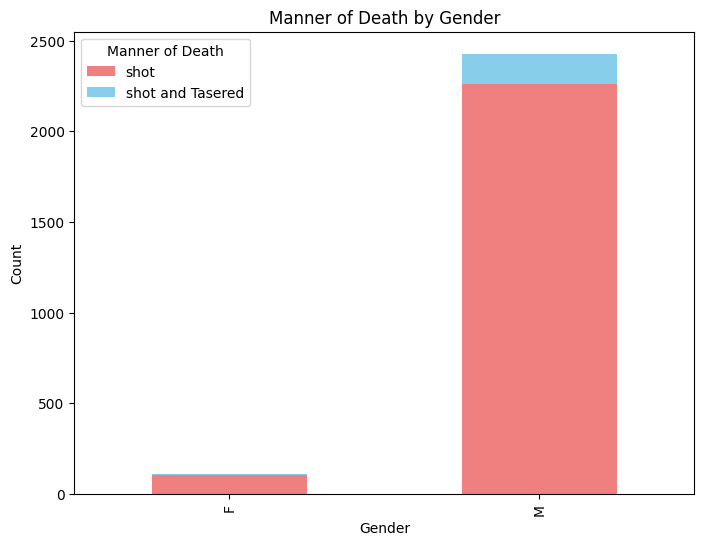

In [25]:
gender_manner = data.groupby(['gender', 'manner_of_death']).size().unstack()
gender_manner.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightcoral', 'skyblue'])
plt.title('Manner of Death by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Manner of Death')
plt.show()


# **2. Line Plot: Trend of Incidents Over Time**
Purpose:
# Shows how incidents have occurred over time, revealing patterns or trends.
Interpretation:
# This line plot indicates whether incidents have increased, decreased, or remained stable over the years. Peaks could highlight specific events or policy changes.

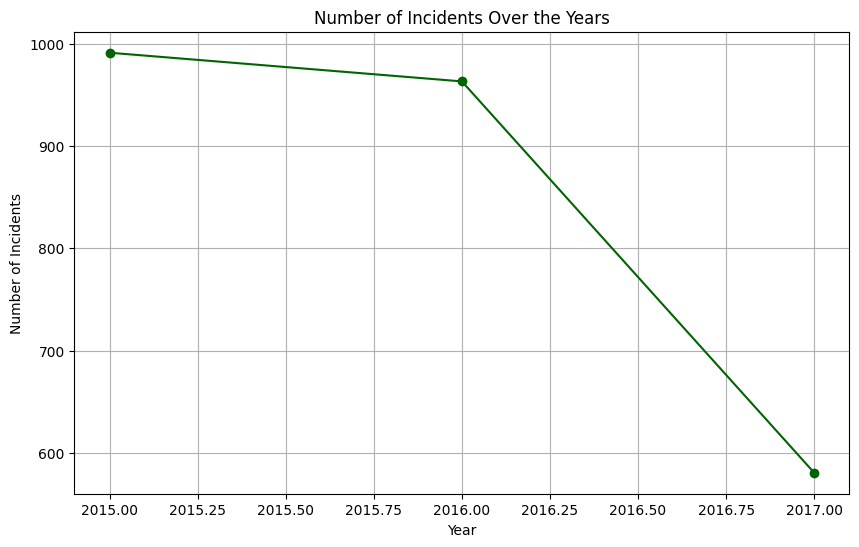

In [26]:

incident_trend = data['date'].dt.year.value_counts().sort_index()
incident_trend.plot(kind='line', marker='o', figsize=(10, 6), color='darkgreen')
plt.title('Number of Incidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()


# **3. Horizontal Bar Chart: Top 10 Cities with Most Incidents**
Purpose:
# Identifies cities with the highest number of incidents.
Interpretation:
# This chart highlights the cities where incidents are most frequent. The most frequent city might warrant further investigation to determine underlying causes.

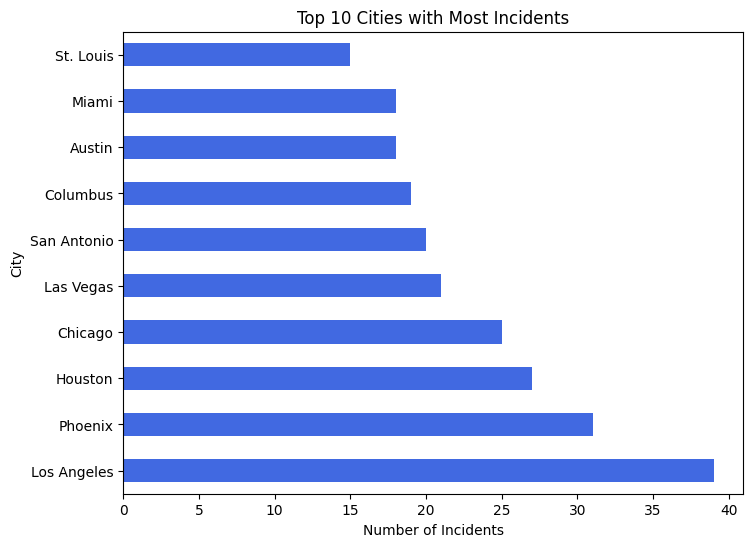

In [27]:
top_cities = data['city'].value_counts().head(10)
top_cities.plot(kind='barh', figsize=(8, 6), color='royalblue')
plt.title('Top 10 Cities with Most Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('City')
plt.show()


# **4. Scatter Plot: Age vs. Armed Status**
Purpose:
# Explores the relationship between age and armed status.
Interpretation:
# Each dot represents an individual. Patterns may show whether certain age groups are more likely to be armed. Clusters may indicate specific tendencies.

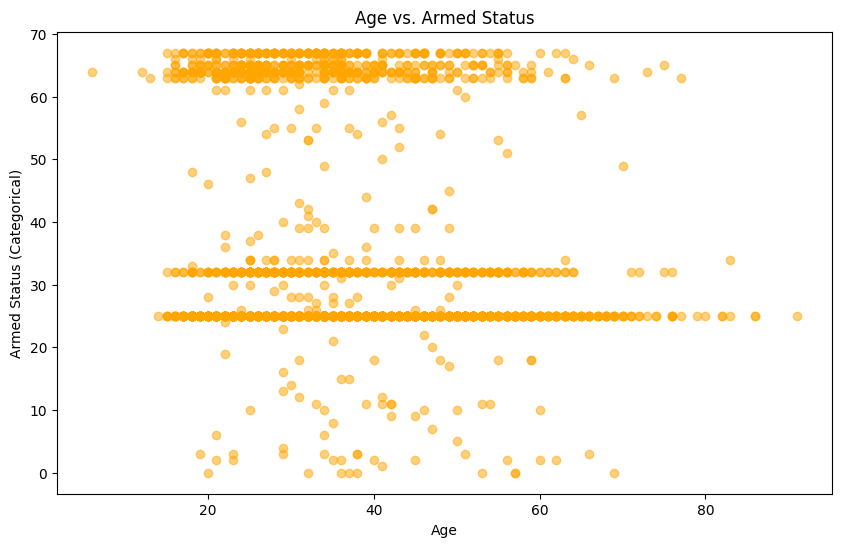

In [28]:
armed_status = data[data['armed'] != 'Unknown']  # Exclude unknown values
plt.figure(figsize=(10, 6))
plt.scatter(armed_status['age'], armed_status['armed'].astype('category').cat.codes, alpha=0.5, color='orange')
plt.title('Age vs. Armed Status')
plt.xlabel('Age')
plt.ylabel('Armed Status (Categorical)')
plt.show()


# **5. Violin Plot: Age Distribution by Signs of Mental Illness**
Purpose:
# Visualizes the age distribution while comparing individuals with and without signs of mental illness.
Interpretation:
# This plot shows how age varies for individuals with and without signs of mental illness. Wider sections indicate higher densities at those ages.

<ipython-input-29-4f8c221eed0b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='signs_of_mental_illness', y='age', data=data, palette='muted')


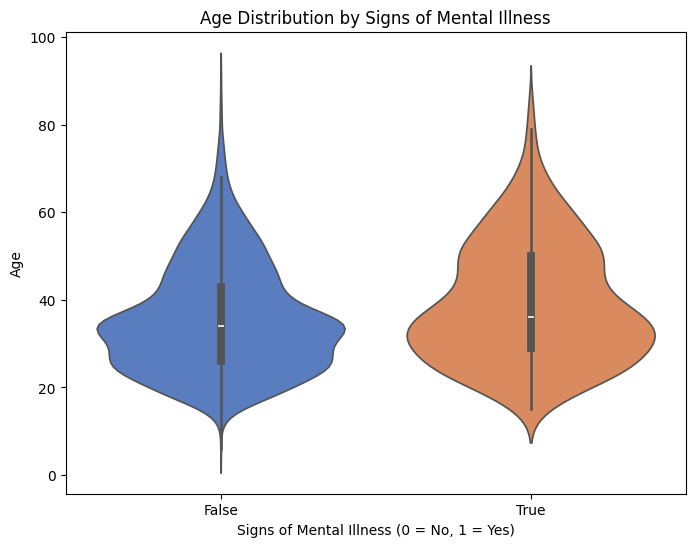

In [29]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='signs_of_mental_illness', y='age', data=data, palette='muted')
plt.title('Age Distribution by Signs of Mental Illness')
plt.xlabel('Signs of Mental Illness (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


# **6. Bubble Chart: Age vs. Threat Level with Armed Status**
 Purpose:
# Combines multiple variables into a single visualization.
Interpretation:
# This graph shows how threat levels and ages are distributed, with bubble sizes representing age magnitude. Larger bubbles suggest older individuals in specific threat categories.

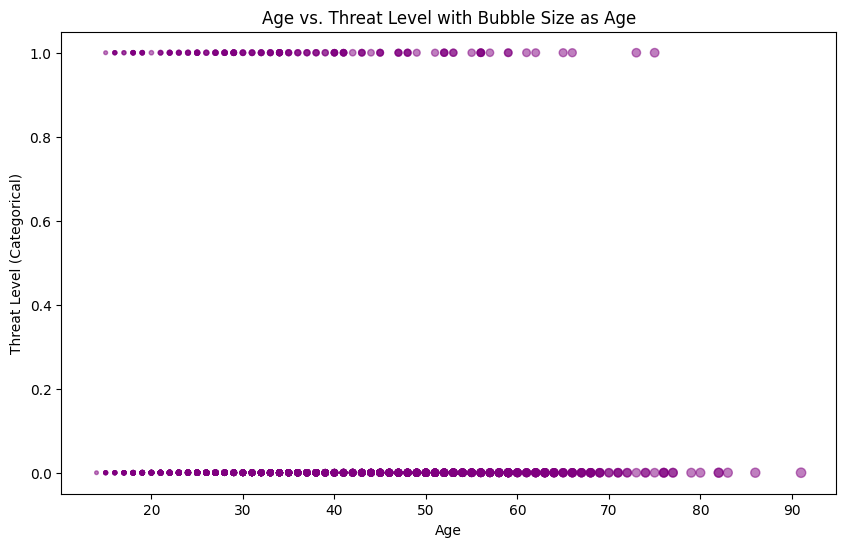

In [30]:
bubble_data = data[data['threat_level'] != 'other']  # Focus on meaningful threat levels
bubble_sizes = bubble_data['age'] / 2  # Scale bubble sizes by age
plt.figure(figsize=(10, 6))
plt.scatter(bubble_data['age'], bubble_data['threat_level'].astype('category').cat.codes,
            s=bubble_sizes, alpha=0.5, c='purple')
plt.title('Age vs. Threat Level with Bubble Size as Age')
plt.xlabel('Age')
plt.ylabel('Threat Level (Categorical)')
plt.show()


# **1. Violin Plot: Age Distribution by Manner of Death**
# Purpose:
Visualizes the distribution of age grouped by manner_of_death to understand age patterns across different death manners.
# Interpretation:
The violin plot shows the distribution of age within each manner_of_death category. The wider sections of the violins indicate higher density of data points in those age ranges.
Insights:
If certain manner of death categories (e.g., "shot") have wider distributions for specific age groups, it may indicate age groups are more likely involved in certain circumstances. The plot also shows whether the age distribution is skewed or symmetrically distributed.

<ipython-input-34-e613034d55ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='manner_of_death', y='age', palette='muted')


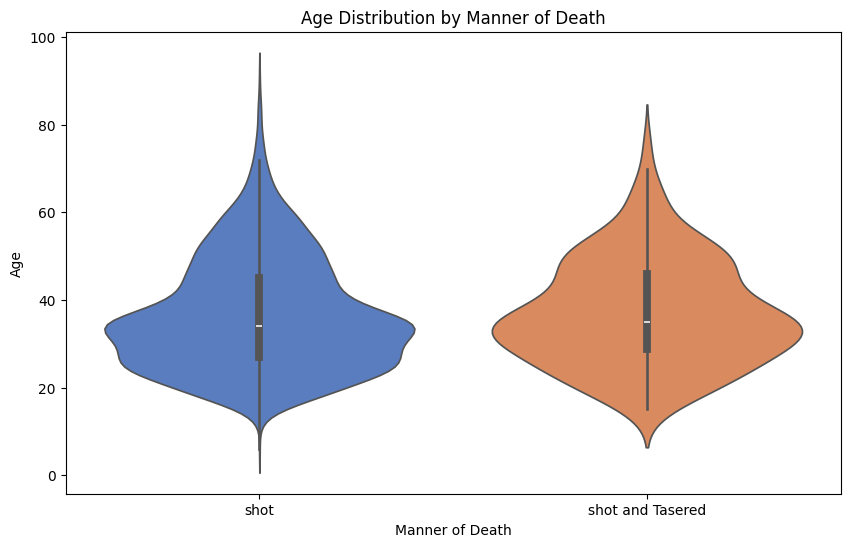

In [34]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='manner_of_death', y='age', palette='muted')
plt.title('Age Distribution by Manner of Death')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.show()


# **2. Count Plot: Deaths by Race**
# Purpose:
Shows the count of deaths for each race category, providing insights into how incidents are distributed across racial groups.
# Interpretation:
The count plot displays the frequency of deaths for each race group.
Insights:
This plot helps identify if certain racial groups are disproportionately represented in the dataset. A large count for a particular race category may suggest that group has a higher frequency of incidents.

<ipython-input-35-a891a0e35008>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='race', palette='Set2')


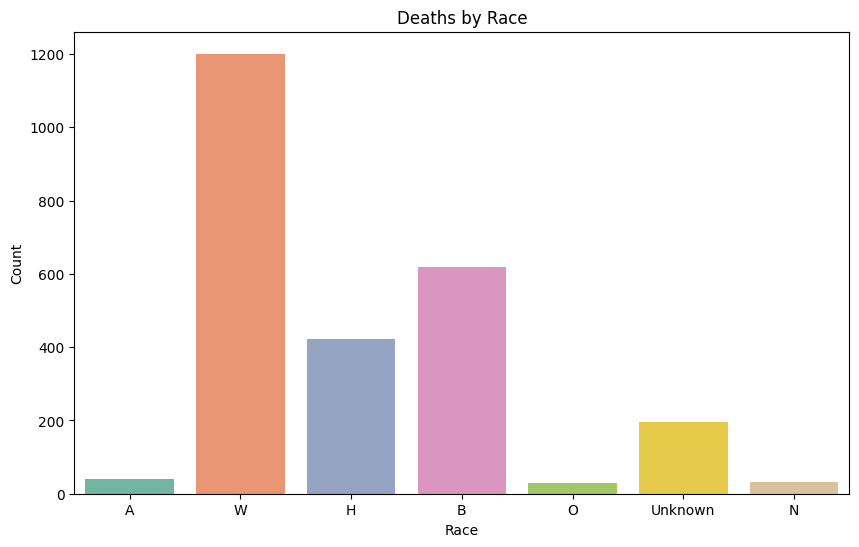

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='race', palette='Set2')
plt.title('Deaths by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


# **3. Heatmap: Correlation Matrix**
# Purpose:
Displays the correlation between numerical variables to identify relationships between them.
# Interpretation:
The heatmap shows correlations between numerical columns such as age, threat_level_encoded, and signs_of_mental_illness.
Insights: Strong correlations (values close to 1 or -1) suggest a significant relationship between variables. For example, a high correlation between age and threat_level_encoded could indicate that certain age groups tend to experience higher threat levels

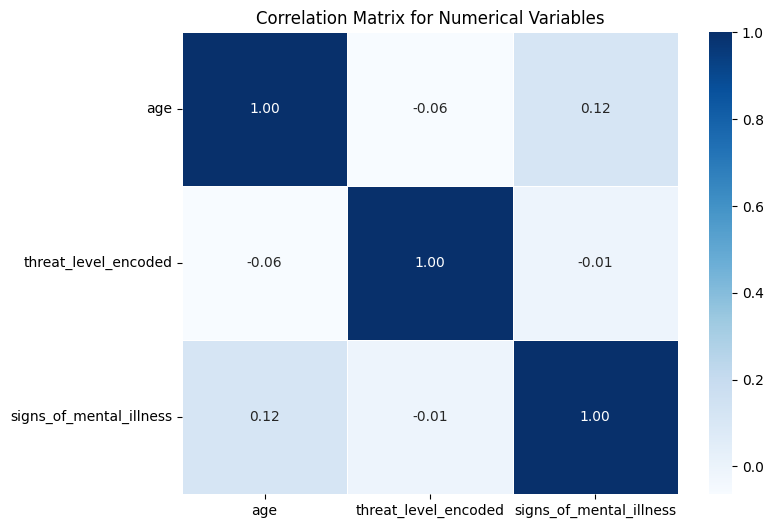

In [37]:
# Assuming 'threat_level' is the original column, encode it numerically
# For example, if 'threat_level' has categories 'attack', 'other', 'undetermined':
data['threat_level_encoded'] = data['threat_level'].map({'attack': 1, 'other': 2, 'undetermined': 3})

# Now you can compute the correlation
numerical_corr = data[['age', 'threat_level_encoded', 'signs_of_mental_illness']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

# **4. Pair Plot: Relationship Between Age, Threat Level, and Mental Illness**
# Purpose:
Explores the pairwise relationships between age, threat_level_encoded, and signs_of_mental_illness.
# Interpretation:
The pair plot shows scatterplots and histograms for each pair of numerical variables.
Insights: It helps reveal how age, threat_level_encoded, and signs_of_mental_illness are related. A scatterplot with a clear linear or non-linear trend may indicate a strong relationship. This also shows how signs_of_mental_illness affects these relationships.

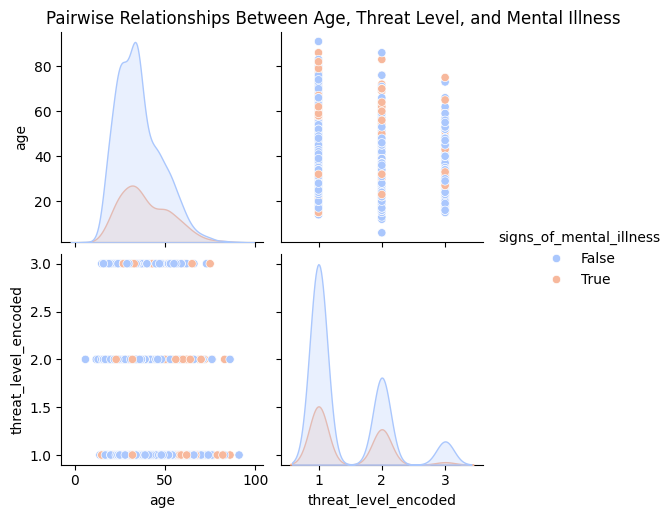

In [38]:
sns.pairplot(data[['age', 'threat_level_encoded', 'signs_of_mental_illness']], hue='signs_of_mental_illness', palette='coolwarm')
plt.suptitle('Pairwise Relationships Between Age, Threat Level, and Mental Illness', y=1.02)
plt.show()


# **5. Box Plot: Age Distribution by Race**
# Purpose:
Visualizes the spread of age for each race category, identifying outliers and variability.
# Interpretation:
The box plot shows the spread of age across different race categories.
Insights: The box plot highlights the median age, interquartile range (IQR), and potential outliers. If one race has a significantly higher median age than others, it might suggest different age groups are more likely to be involved in incidents for that race

<ipython-input-39-557acce59401>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='race', y='age', palette='Set3')


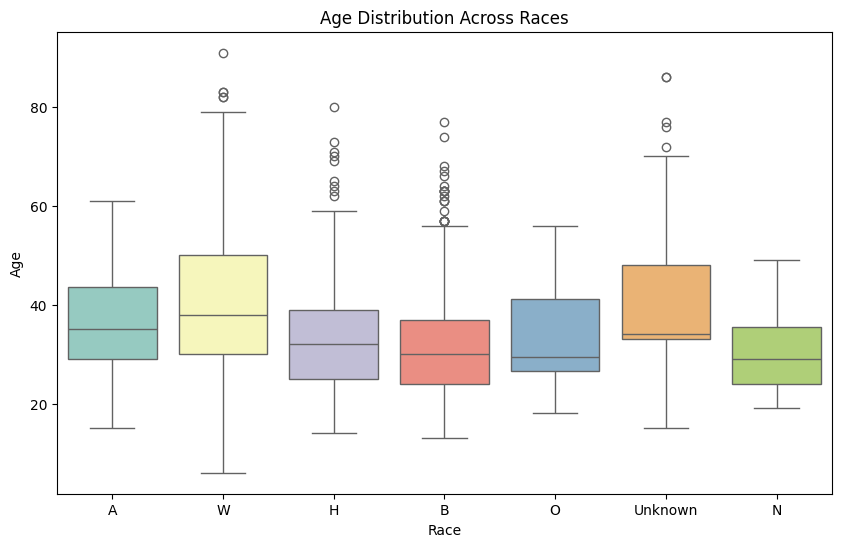

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='race', y='age', palette='Set3')
plt.title('Age Distribution Across Races')
plt.xlabel('Race')
plt.ylabel('Age')
plt.show()


# **6. Facet Grid: Age Distribution by Race and Mental Illness**
# Purpose:
Visualizes the distribution of age for each race category, split by whether signs of mental illness are present.
# Interpretation:
The facet grid creates separate histograms for each race category, showing the distribution of age for individuals with and without mental illness.
Insights: It helps identify patterns in age distributions across races and mental illness. For example, if one race has a higher age range for those with mental illness, this could suggest specific age-related factors.

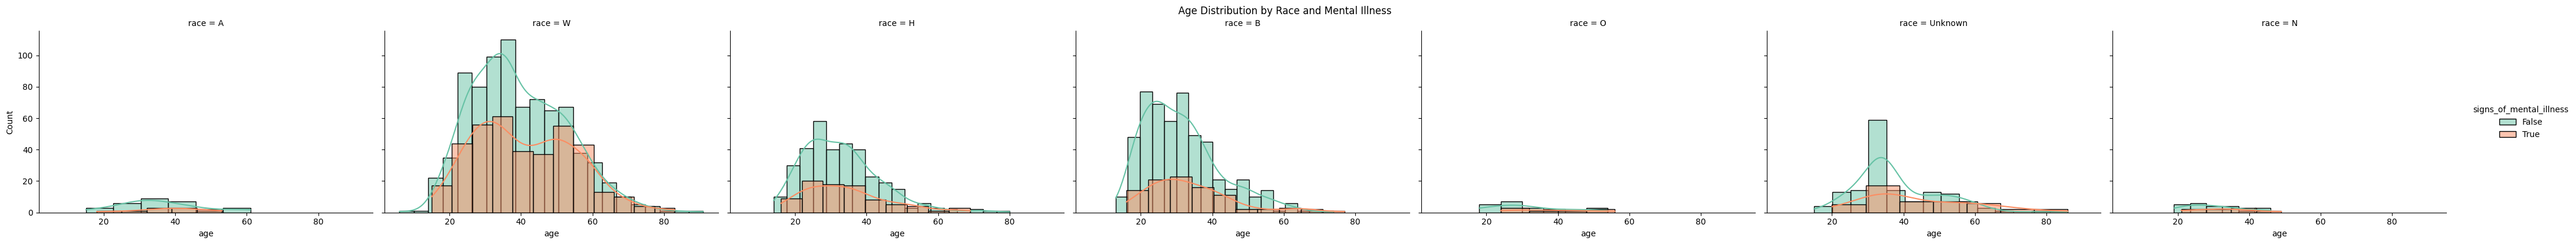

In [40]:
g = sns.FacetGrid(data, col='race', hue='signs_of_mental_illness', height=4, aspect=1.5, palette='Set2')
g.map(sns.histplot, 'age', kde=True)
g.add_legend()
plt.suptitle('Age Distribution by Race and Mental Illness', y=1.02)
plt.show()


# **7. Swarm Plot: Age vs. Manner of Death**
# Purpose:
Shows the distribution of age for each manner_of_death category, with individual points representing data.
# Interpretation:
The swarm plot displays individual data points, allowing for a detailed view of age distribution by manner_of_death.
Insights: Outliers and clustering patterns are easily visible. If certain manner_of_death categories show clustering around specific age ranges, it may suggest that age is a factor in the manner of death.

<ipython-input-41-618f0ea3d444>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data, x='manner_of_death', y='age', palette='Set1', alpha=0.7)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 27.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


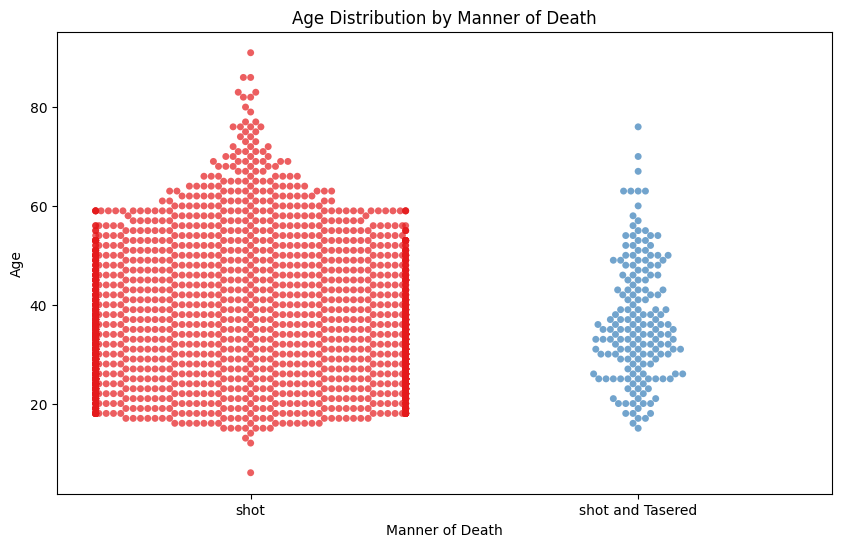

In [41]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x='manner_of_death', y='age', palette='Set1', alpha=0.7)
plt.title('Age Distribution by Manner of Death')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.show()


# **8. Bar Plot: Count of Deaths by Threat Level**
# Purpose:
Shows the count of deaths for each threat_level, broken down by manner_of_death.
# Interpretation:
The bar plot visualizes the number of deaths categorized by threat_level and manner_of_death.
Insights: This plot helps in understanding if certain threat levels are linked to particular manners of death. For example, if the high threat level correlates with more deaths due to shot, it could suggest that higher threat levels are associated with lethal outcomes.

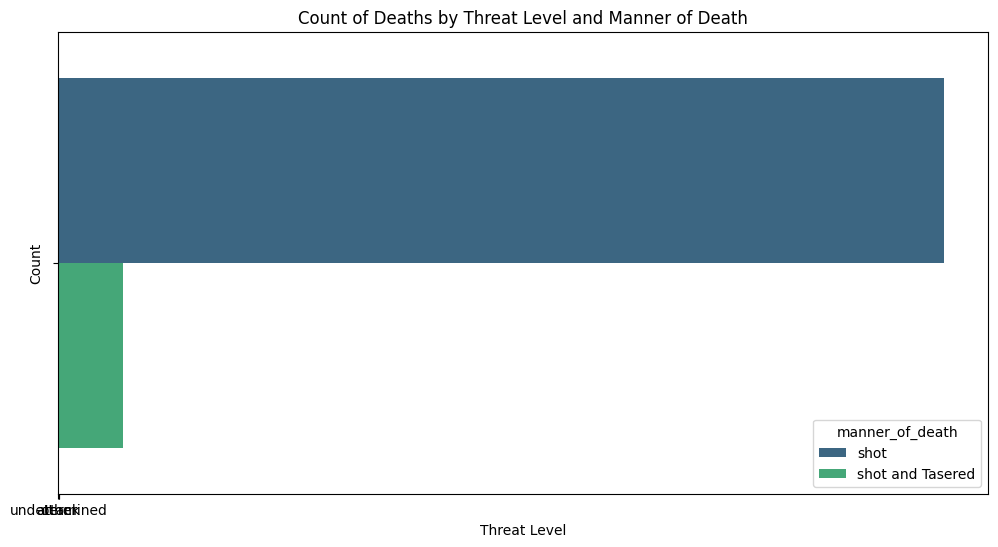

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='threat_level', hue='manner_of_death', estimator=len, palette='viridis')
plt.title('Count of Deaths by Threat Level and Manner of Death')
plt.xlabel('Threat Level')
plt.ylabel('Count')
plt.show()

# **9. KDE Plot: Age Distribution by Armed Status**
# Purpose:
Compares the smooth density of age for individuals who were armed vs. unarmed.
# Interpretation:
The KDE plot shows the smooth density distribution of age for armed versus unarmed individuals.
Insights: This plot helps in comparing the age distribution of armed and unarmed individuals. If the distributions are distinct, it may suggest that certain age groups are more likely to be armed.

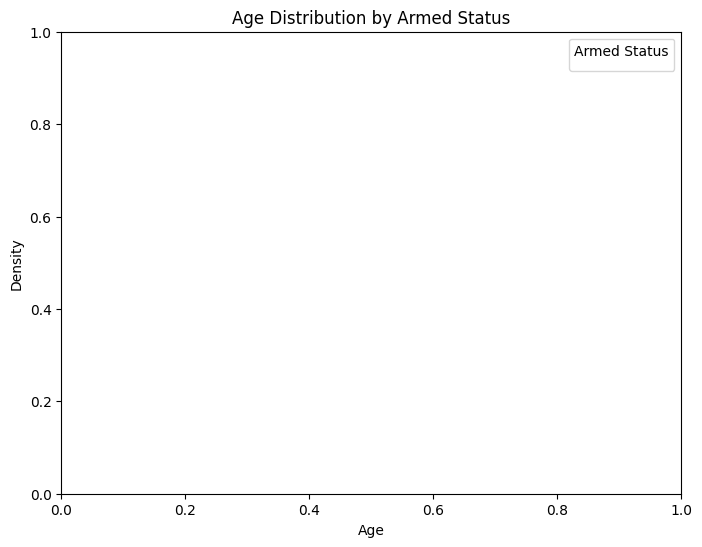

In [47]:
# Ensure 'armed' column has no null values
data['armed'].fillna('Unknown', inplace=True)

# Plot KDE with fill=True instead of deprecated shade
plt.figure(figsize=(8, 6))

# KDE for "Armed" group with explicit label
sns.kdeplot(data=data[data['armed'] == 'Yes']['age'], fill=True, color='blue', label='Armed', alpha=0.6)

# KDE for "Not Armed" group with explicit label
sns.kdeplot(data=data[data['armed'] == 'No']['age'], fill=True, color='red', label='Not Armed', alpha=0.6)

# Add title and labels
plt.title('Age Distribution by Armed Status')
plt.xlabel('Age')
plt.ylabel('Density')

# Ensure the legend is visible and correctly placed
plt.legend(title="Armed Status", loc='upper right')

# Show the plot
plt.show()
